# US Housing Market Analysis

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [3]:
# Read in data
file_path = Path("data/supply.csv")
supply_df = pd.read_csv(file_path)
supply_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


In [4]:
# Read in data
file_path = Path("data/demand.csv")
demand_df = pd.read_csv(file_path)
demand_df.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [5]:
# combine data
combined_df = pd.merge(supply_df, demand_df, on="DATE")
combined_df.head()

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_y,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [6]:
# rename CSUSHPISA_x to CSUSHPISA and drop CSUSHPISA_y
combined_df = combined_df.rename(columns={"CSUSHPISA_x": "CSUSHPISA"})
combined_df = combined_df.drop(columns=["CSUSHPISA_y"])
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [15]:
# fill NaN values for INTDSRUSM193N with value from previous row
combined_df["INTDSRUSM193N"] = combined_df["INTDSRUSM193N"].fillna(method="ffill")
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [28]:
combined_df.shape

(81, 11)

# Defining the feature and target variables

In [16]:
# Define features set
X = combined_df.copy()
X = X.drop("DATE", axis=1)
X = X.drop("CSUSHPISA", axis=1)
X.head()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [17]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(81, 9)
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
MORTGAGE30US      0
UMCSENT           0
INTDSRUSM193N     0
MSPUS             0
GDP               0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [27]:
# Define target vector
y = combined_df["CSUSHPISA"].values.reshape(-1, 1)
y[:39]

array([['129.321'],
       ['131.756'],
       ['135.013'],
       ['138.8356667'],
       ['143.2986667'],
       ['148.209'],
       ['152.7166667'],
       ['157.5353333'],
       ['163.4813333'],
       ['169.3473333'],
       ['174.58'],
       ['179.5393333'],
       ['183.3243333'],
       ['183.9973333'],
       ['182.8193333'],
       ['183.6493333'],
       ['184.422'],
       ['181.6213333'],
       ['178.2613333'],
       ['175.37'],
       ['171.5756667'],
       ['166.6723333'],
       ['161.9543333'],
       ['156.0286667'],
       ['150.06'],
       ['147.9113333'],
       ['148.237'],
       ['147.97'],
       ['146.295'],
       ['146.1713333'],
       ['143.973'],
       ['142.254'],
       ['140.618'],
       ['139.9243333'],
       ['139.2346667'],
       ['137.2596667'],
       ['137.0143333'],
       ['140.1133333'],
       ['142.2863333']], dtype=object)

# Splitting the data into training and testing sets

In [19]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [21]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [22]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [23]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [24]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [32]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   ['152.7166667' '201.4513333' '138.8356667' '140.1133333' '181.6213333'
 '152.8543333' '129.321' '163.4813333' '187.3716667' '187.3716667']
First 10 Actual labels: [['148.209'], ['199.1546667'], ['143.2986667'], ['137.0143333'], ['178.2613333'], ['156.9313333'], ['131.756'], ['169.3473333'], ['189.6213333'], ['192.6373333']]


# Evaluating the Random Forest model

In [35]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(10)
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
results_df

,Prediction,Actual,Difference,Percent Difference
0,152.716667,148.209000,-4.507667,-3.041426
1,201.451333,199.154667,-2.296667,-1.153208
2,138.835667,143.298667,4.463000,3.114474
3,140.113333,137.014333,-3.099000,-2.261807
4,181.621333,178.261333,-3.360000,-1.884873
5,152.854333,156.931333,4.077000,2.597952
6,129.321000,131.756000,2.435000,1.848113
7,163.481333,169.347333,5.866000,3.463887
8,187.371667,189.621333,2.249667,1.186400
9,187.371667,192.637333,5.265667,2.733461


In [36]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.109299990000008


In [37]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 15.615486110335585


In [38]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.9516434695371476


In [39]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: 2.3285599994743658


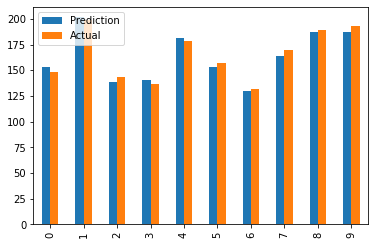

In [40]:
# make a graph of the predictions vs actual with percent difference
results_df.plot(y=["Prediction", "Actual"], kind="bar")
plt.show()


In [30]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.0


# Feature importance

In [29]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

MSACSR: (0.11115990312110767)
PERMIT: (0.1178120769790979)
TLRESCONS: (0.11761000357394384)
EVACANTUSQ176N: (0.1136318733979295)
MORTGAGE30US: (0.12415999242271272)
UMCSENT: (0.1294819696300671)
INTDSRUSM193N: (0.06470307974813638)
MSPUS: (0.1110671187014654)
GDP: (0.11037398242553952)
